## Predicting buildozer prices using machine learning

### dataset

this dataset is obtained from kaggle,you can check it here
https://www.kaggle.com/c/bluebook-for-bulldozers/overview

### Features

definition for all features are present in the data dictionary excel sheet, which is on the root directory

In [1]:
#importing our tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#loading our buildozer data
data = pd.read_csv('buildozer_data.csv')
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check how many missing values does our dataframe have
data.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
auctioneerID                   0
YearMade                       0
MachineHoursCurrentMeter       0
UsageBand                    634
saledate                       0
fiModelDesc                    0
fiBaseModel                    0
fiSecondaryDesc             1731
fiModelSeries               4318
fiModelDescriptor           3802
ProductSize                 2708
fiProductClassDesc             0
state                          0
ProductGroup                   0
ProductGroupDesc               0
Drive_System                3877
Enclosure                      3
Forks                       2443
Pad_Type                    4153
Ride_Control                3313
Stick                       4153
Transmission                3037
Turbocharged                4153
Blade_Extension             4727
Blade_Width                 4727
Enclosure_

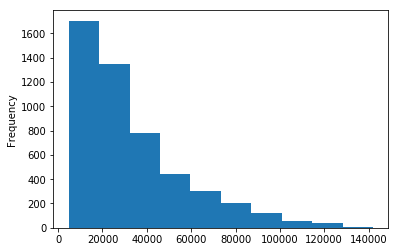

In [4]:
data["SalePrice"].plot.hist();

### Parsing Dates

* When we work with time series data, we want to enrich time and date component as much as possible
* We can tell it to pandas which of our column has date and times by using `parse_dates` parameter

In [3]:
#so we load the csv again with parse_dates method
data = pd.read_csv('buildozer_data.csv',
                  parse_dates=["saledate"])
data["saledate"][:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

so now our dates are converted from objects to datetime characters

### Now we scatter plot the dates with saleprice

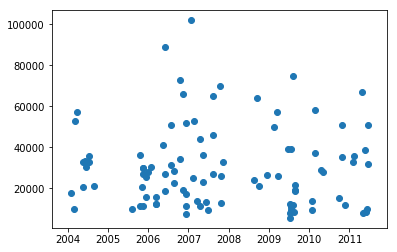

In [6]:
plt.scatter(data["saledate"][:100],data["SalePrice"][:100]);

## Sort dataframe by saledate

* when working with time series data, it's a good idea to sort it by date. 

In [5]:
data.sort_values(by=["saledate"],inplace=True)

In [8]:
data["saledate"][:10]

4051   2004-01-19
243    2004-01-20
4035   2004-01-27
3150   2004-01-29
1275   2004-01-29
1720   2004-01-29
2799   2004-01-29
2771   2004-01-29
465    2004-01-29
2735   2004-01-29
Name: saledate, dtype: datetime64[ns]

## Feature Engineering

* The process of enriching our features is called feature engineering.
* so here we gonna take our saledate column and split it to year,month,day,day of the week,day of the month to make our machine learning model to understand easily.

In [6]:
data["saleYear"] = data.saledate.dt.year
data["saleMonth"] = data.saledate.dt.month
data["saleDay"] = data.saledate.dt.day
data["saleDayOfWeek"] = data.saledate.dt.dayofweek
data["saleDayOfYear"] = data.saledate.dt.dayofyear

In [10]:
#now we enriched the datetime field
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
4051,1152803,30000,1000789,12263,121,3.0,1998,4302.0,Medium,2004-01-19,...,NaN,NaN,NaN,NaN,NaN,2004,1,19,0,19
243,1140049,33000,1055591,1956,121,3.0,1995,5468.0,Medium,2004-01-20,...,NaN,NaN,NaN,NaN,NaN,2004,1,20,1,20
4035,1152749,10000,1005668,4665,121,3.0,1989,6119.0,Low,2004-01-27,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,2004,1,27,1,27
3150,1149834,39000,847793,3542,121,3.0,2001,2129.0,Medium,2004-01-29,...,NaN,NaN,NaN,NaN,NaN,2004,1,29,3,29
1275,1143543,11750,54985,9551,121,3.0,1999,661.0,Low,2004-01-29,...,NaN,NaN,NaN,NaN,NaN,2004,1,29,3,29


In [7]:
#so we splitted the saledate feature and added to four different categories,now we can remove saledate column
data.drop("saledate",axis=1,inplace=True)

### Filling Missing Values

* If our dataset has 80% of missing data we can delete mssing data with `dropna()` method, but in our dataset many column has over 60%-90% of missing data.
* So to solve this, we can fill categorical columns with 0 and numerical columns with median. 

In [8]:
#create a copy of our data
data_tmp3 = data.copy()

In [9]:
#if the column is object fill it with 0
for i in data_tmp3.columns:
    if data_tmp3[i].dtype == 'object':
        data_tmp3[i].fillna(0,inplace=True)

In [14]:
#now our dataframe has no missing values
data_tmp3.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

### Converting Data into numbers

All machine learning models requires numerical data, so we need to convert non-numerical data into numeric data

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in data_tmp3.columns:
    if data_tmp3[i].dtype == 'object':
        data_tmp3[i] = encoder.fit_transform(list(data_tmp3[i]))    

### Modeling

* So our data cleaning tasks are over now we gonna create a machine learning model

In [11]:
x = data_tmp3.drop('SalePrice',axis=1)
y = data_tmp3['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
estimator.fit(x_train,y_train)

estimator.score(x_test,y_test)

0.8152018948232241

In [18]:
y_preds = estimator.predict(x_test)

our machine learning model got a good score

## Hyper tuning our model

In [19]:
#creating a grid for our regressor
rf_reg_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [20]:
from sklearn.model_selection import RandomizedSearchCV
rs_rf_clf = RandomForestRegressor();

rf_random = RandomizedSearchCV(estimator = rs_rf_clf, 
                               param_distributions = rf_reg_grid, 
                               n_iter = 20, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42,
                               n_jobs = -1);
# Fit the random search model
rf_random.fit(x_train,y_train);
rf_random.score(x_test,y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.5min finished


0.8228401342882176

after hypertuning our model,it got a good score

Our model is ready, it has an accuracy of approximately 82%. which is a good score.

## Evaluation

### cross validation
* cross validation is a good way to evaluate our model.
* it splits our dataset into five training and test sets and it returns an array of test score,by taking mean and median we can check the whole accuracy of the model.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor()

cf_score = cross_val_score(clf,x,y,cv=5)
np.mean(cf_score)

0.7631420334337515

In [15]:
np.median(cf_score)

0.7667546395064638